File yang tersedia: ['student-mat.csv', 'student-por.csv', 'student-merge.R', 'student.txt']

Jumlah data dan fitur: (395, 33)

Jumlah missing values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Korelasi dengan G3:
 G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltim

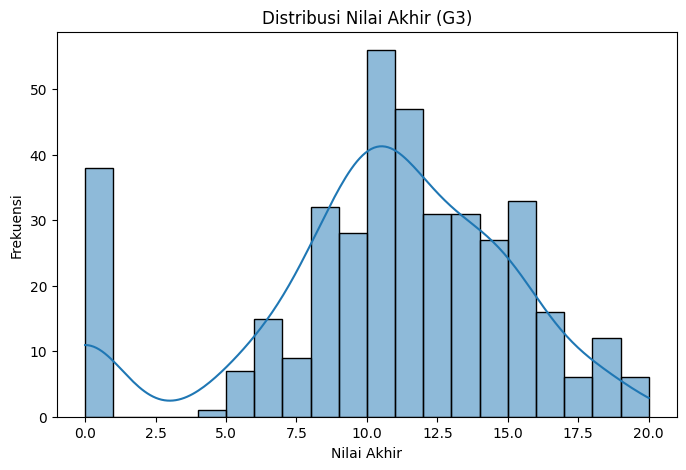


Perbandingan Nilai Asli dan Nilai Prediksi:
   Nilai Asli (G3)  Nilai Prediksi (G3)
0               10                 8.20
1               12                11.77
2                5                 6.72
3               10                 9.60
4                9                 8.72
5               13                12.86
6               18                18.68
7                6                 6.88
8                0                 6.90
9               14                13.32

 Evaluasi Model Random Forest:
- Mean Squared Error (MSE): 3.93
- Root Mean Squared Error (RMSE): 1.98
- R-squared (R2 Score): 0.81


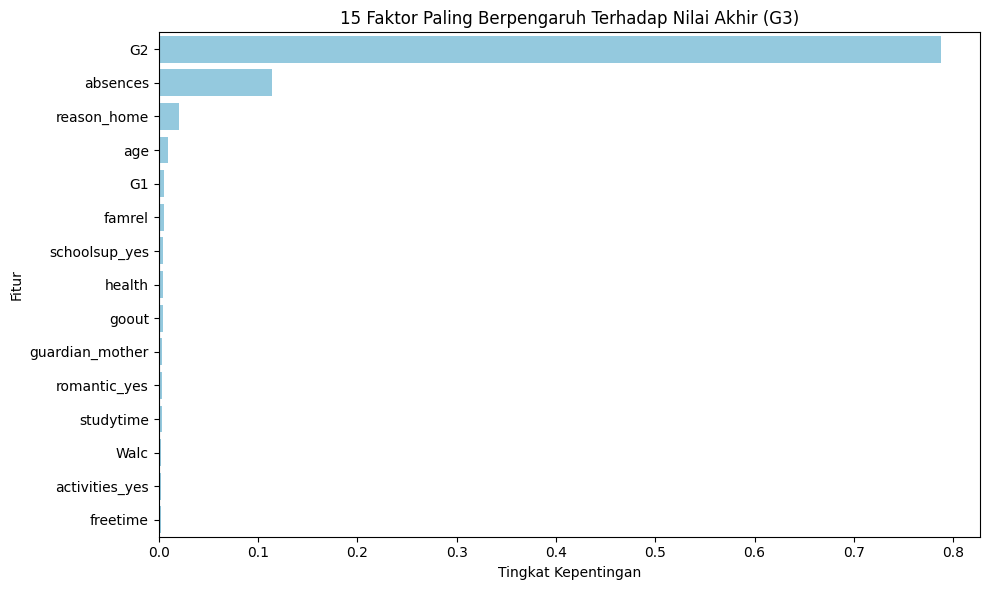


 Laporan: Faktor-Faktor Teratas yang Mempengaruhi Prestasi Siswa:
            Feature  Importance
40               G2    0.787558
38         absences    0.114431
13      reason_home    0.020126
26              age    0.009488
39               G1    0.005721
32           famrel    0.005685
18    schoolsup_yes    0.004514
37           health    0.004281
34            goout    0.004135
16  guardian_mother    0.003728
25     romantic_yes    0.003460
30        studytime    0.003239
36             Walc    0.002754
21   activities_yes    0.002653
33         freetime    0.002341


In [ ]:
import pandas as pd
import zipfile
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Download ZIP dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
r = requests.get(url)

# Simpan zip ke file lokal
with open('student.zip', 'wb') as f:
    f.write(r.content)

# Ekstrak file zip
with zipfile.ZipFile('student.zip', 'r') as zip_ref:
    zip_ref.extractall('student_data')

# Cek file hasil ekstraksi
extracted_files = os.listdir('student_data')
print("File yang tersedia:", extracted_files)

# 2. Load dataset student-mat.csv
df = pd.read_csv('student_data/student-mat.csv', sep=';')

# 3. EDA Ringan
print("\nJumlah data dan fitur:", df.shape)
print("\nJumlah missing values:\n", df.isnull().sum())

# Korelasi dengan nilai akhir (G3)
correlation = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)
print("\nKorelasi dengan G3:\n", correlation)

# Visualisasi distribusi nilai akhir
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribusi Nilai Akhir (G3)')
plt.xlabel('Nilai Akhir')
plt.ylabel('Frekuensi')
plt.show()

# 4. Preprocessing
X = df.drop('G3', axis=1)
y = df['G3']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_cols),
        ('numerical', 'passthrough', numerical_cols)
    ])

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

# 7. Training
model.fit(X_train, y_train)

# 8. Evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Buat DataFrame perbandingan nilai asli dan prediksi
hasil_prediksi = pd.DataFrame({
    'Nilai Asli (G3)': y_test.values,
    'Nilai Prediksi (G3)': y_pred.round(2)
})

# Tampilkan 10 data pertama
print("\nPerbandingan Nilai Asli dan Nilai Prediksi:")
print(hasil_prediksi.head(10))

print("\n Evaluasi Model Random Forest:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"- R-squared (R2 Score): {r2:.2f}")

# 9. Feature Importance
# Ambil nama fitur setelah one-hot encoding
encoded_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([encoded_features, numerical_cols])

importances = model.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('15 Faktor Paling Berpengaruh Terhadap Nilai Akhir (G3)')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

# 10. Laporan
print("\n Laporan: Faktor-Faktor Teratas yang Mempengaruhi Prestasi Siswa:")
print(importance_df)